In [1]:
# Iris Flower classification

In [1]:
#import main 2 libraries
import numpy as np
import pandas as pd

In [3]:
#brining the csv file to a pandas dataframe
data=pd.read_csv('iris.csv')

In [4]:
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [5]:
data.shape

(150, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
#we don't need the 1st column so let's drop that
data=data.iloc[:,1:]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#check for null values
data.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [15]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

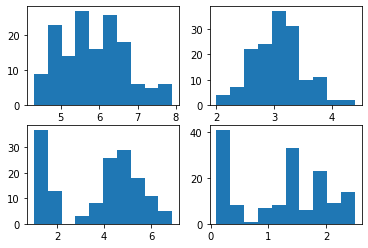

In [24]:
#histograms
plt.subplot(2,2,1)
plt.hist(data['Sepal.Length'])
plt.subplot(2,2,2)
plt.hist(data['Sepal.Width'])
plt.subplot(2,2,3)
plt.hist(data['Petal.Length'])
plt.subplot(2,2,4)
plt.hist(data['Petal.Width'])
plt.show

In [33]:
#scatter plots
colors=['red','yellow','green']
species=['setosa', 'versicolor', 'virginica']

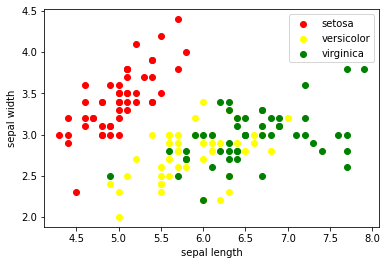

In [34]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['Sepal.Length'],x['Sepal.Width'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

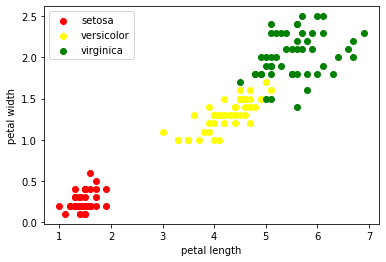

In [35]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['Petal.Length'],x['Petal.Width'], c=colors[i], label=species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

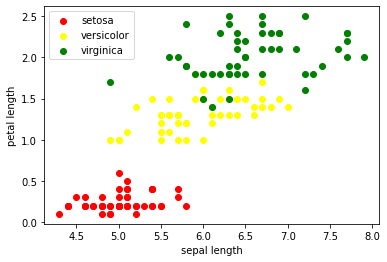

In [36]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['Sepal.Length'],x['Petal.Width'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

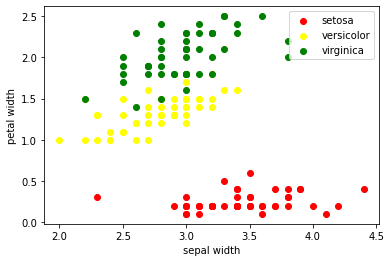

In [37]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['Sepal.Width'],x['Petal.Width'], c=colors[i], label=species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

In [39]:
#coorealation matrix to check inter depandability of columns
data.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [40]:
# as the output is a classification of strings we need to import label encoder to make that numeric
from sklearn.preprocessing import LabelEncoder 

In [41]:
le= LabelEncoder()

In [43]:
data['Species']= le.fit_transform(data['Species'])

In [45]:
# 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2
data['Species'].unique()

array([0, 1, 2])

In [48]:
# separating inputs & outputs
x=data.drop(columns=['Species'])
y=data['Species']

In [49]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [51]:
# train test split  70% in train
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [53]:
x_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
71,6.1,2.8,4.0,1.3
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
51,6.4,3.2,4.5,1.5
146,6.3,2.5,5.0,1.9


In [59]:
y_test.head()

99     1
57     1
22     0
130    2
117    2
Name: Species, dtype: int32

In [55]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [57]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')

In [58]:
scaler=StandardScaler()

In [61]:
# KNN(k nearest neighbors) algorithm
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn= KNeighborsClassifier()

In [63]:
pipe = make_pipeline(column_trans,scaler,knn)

In [64]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [65]:
y_pred_knn= pipe.predict(x_test)

In [66]:
r2_score(y_test,y_pred_knn)

0.9683988764044944

In [68]:
#logistic regression algorithm
from sklearn.linear_model import LogisticRegression

In [69]:
lr= LogisticRegression()

In [70]:
pipe=make_pipeline(column_trans,scaler,lr)

In [71]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [72]:
y_pred_lr=pipe.predict(x_test)

In [73]:
r2_score(y_test,y_pred_lr)

0.9683988764044944

In [74]:
#as both the algorithm gives same o/p so we can use any of the algorithm

In [75]:
#testing the pipe is predicting or not
pipe.predict([[1.2,1.5,1.6,1.2]])

array([0])

In [77]:
# saving the model
import pickle

In [78]:
pickle.dump(pipe,open('iris_flower.pkl','wb'))